# 데이터 및 모듈

In [304]:
import pandas as pd
import os

In [305]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [306]:
df_u1 = pd.read_csv('/content/drive/MyDrive/데이터/산업인공지능/호기별 데이터/unit1_df.csv')
df_u2 = pd.read_csv('/content/drive/MyDrive/데이터/산업인공지능/호기별 데이터/unit2_df.csv')
df_u3 = pd.read_csv('/content/drive/MyDrive/데이터/산업인공지능/호기별 데이터/unit3_df.csv')
df_u4 = pd.read_csv('/content/drive/MyDrive/데이터/산업인공지능/호기별 데이터/unit4_df.csv')
df_u8 = pd.read_csv('/content/drive/MyDrive/데이터/산업인공지능/호기별 데이터/unit8_df.csv')

In [307]:
mean_values = df_u1.mean()  # 변수들의 평균값 계산
df_u1 = df_u1.fillna(mean_values)  # 결측치를 평균값으로 대체

mean_values = df_u2.mean()  # 변수들의 평균값 계산
df_u2 = df_u2.fillna(mean_values)  # 결측치를 평균값으로 대체

mean_values = df_u3.mean()  # 변수들의 평균값 계산
df_u3 = df_u3.fillna(mean_values)  # 결측치를 평균값으로 대체

mean_values = df_u4.mean()  # 변수들의 평균값 계산
df_u4 = df_u4.fillna(mean_values)  # 결측치를 평균값으로 대체

mean_values = df_u8.mean()  # 변수들의 평균값 계산
df_u8 = df_u8.fillna(mean_values)  # 결측치를 평균값으로 대체

<ipython-input-307-5f3b5415df81>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_values = df_u1.mean()  # 변수들의 평균값 계산
<ipython-input-307-5f3b5415df81>:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_values = df_u2.mean()  # 변수들의 평균값 계산
<ipython-input-307-5f3b5415df81>:7: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only t

In [308]:
df_u1 = df_u1.drop(['날짜', '품명', '불량품'], axis = 1)
df_u2 = df_u2.drop(['날짜', '품명', '불량품'], axis = 1)
df_u3 = df_u3.drop(['날짜', '품명', '불량품'], axis = 1)
df_u4 = df_u4.drop(['날짜', '품명', '불량품'], axis = 1)
df_u8 = df_u8.drop(['날짜', '품명', '불량품'], axis = 1)

In [309]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_u1_scaled = scaler.fit_transform(df_u1)
df_u1_scaled = pd.DataFrame(df_u1_scaled, columns=df_u1.columns)

scaler = StandardScaler()
df_u2_scaled = scaler.fit_transform(df_u2)
df_u2_scaled = pd.DataFrame(df_u2_scaled, columns=df_u2.columns)

scaler = StandardScaler()
df_u3_scaled = scaler.fit_transform(df_u3)
df_u3_scaled = pd.DataFrame(df_u3_scaled, columns=df_u3.columns)

scaler = StandardScaler()
df_u4_scaled = scaler.fit_transform(df_u4)
df_u4_scaled = pd.DataFrame(df_u4_scaled, columns=df_u4.columns)

scaler = StandardScaler()
df_u8_scaled = scaler.fit_transform(df_u8)
df_u8_scaled = pd.DataFrame(df_u8_scaled, columns=df_u8.columns)

# 1호기

## 모델링

In [310]:
from sklearn.model_selection import train_test_split

# 데이터를 입력 변수(X)와 출력 변수(y)로 분할
X = df_u1_scaled.drop('불량률', axis = 1)
y = df_u1_scaled['불량률']

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### LSTM

In [311]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Sequential 모델 생성
model = Sequential()

# LSTM 레이어 추가
model.add(LSTM(units=64, input_shape=(X_train.shape[1], 1)))

# 출력 레이어 추가
model.add(Dense(units=1))

# 모델 컴파일
model.compile(optimizer='adam', loss='mean_squared_error')

# 모델 훈련
history= model.fit(X_train, y_train, epochs=40, batch_size=32, validation_split=0.2)

Epoch 1/40
2/2 [==============================] - 4s 610ms/step - loss: 0.8569 - val_loss: 0.2088
Epoch 2/40
2/2 [==============================] - 0s 77ms/step - loss: 0.8417 - val_loss: 0.2084
Epoch 3/40
2/2 [==============================] - 0s 82ms/step - loss: 0.8321 - val_loss: 0.2087
Epoch 4/40
2/2 [==============================] - 0s 71ms/step - loss: 0.8225 - val_loss: 0.2100
Epoch 5/40
2/2 [==============================] - 0s 72ms/step - loss: 0.8166 - val_loss: 0.2118
Epoch 6/40
2/2 [==============================] - 0s 71ms/step - loss: 0.8110 - val_loss: 0.2114
Epoch 7/40
2/2 [==============================] - 0s 77ms/step - loss: 0.8058 - val_loss: 0.2122
Epoch 8/40
2/2 [==============================] - 0s 79ms/step - loss: 0.8002 - val_loss: 0.2113
Epoch 9/40
2/2 [==============================] - 0s 72ms/step - loss: 0.7922 - val_loss: 0.2122
Epoch 10/40
2/2 [==============================] - 0s 71ms/step - loss: 0.7841 - val_loss: 0.2114
Epoch 11/40
2/2 [===========

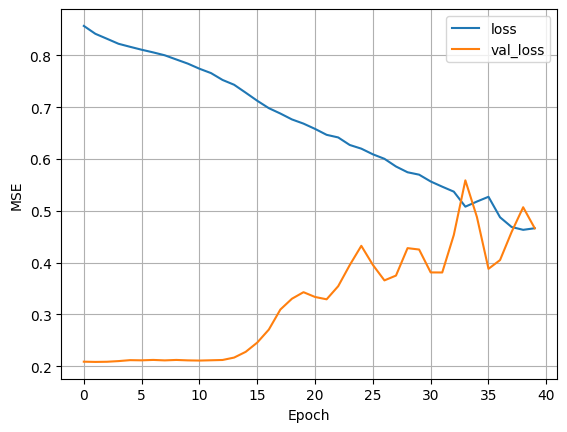

In [312]:
import matplotlib.pyplot as plt 

# 훈련과정을 시각화하기 위한 함수 정의
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss') 
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  # plt.ylim([0,50])
  plt.legend()
  plt.grid(True)

# 훈련과정 시각화
plot_loss(history)

In [313]:
# 테스트 결과 확인 
loss = model.evaluate(X_test, y_test)
print('loss : ', loss)

1/1 [==============================] - 0s 35ms/step - loss: 2.5445
loss :  2.5445051193237305


In [314]:
# 모델 예측
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 451ms/step


1/1 [==============================] - 0s 31ms/step


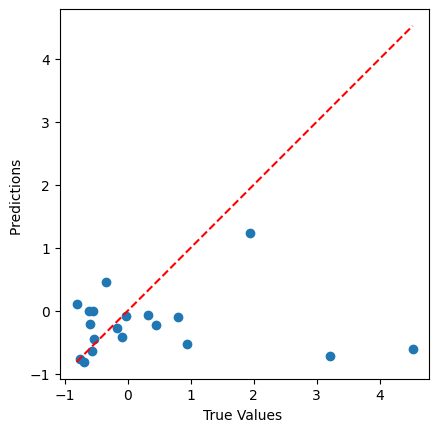

In [315]:
# 실측값과 예측값에 대한 데이터 비교
# y=x 그래프 일수록 학습이 잘된 것임
# 훈련된 모델로 예측하기
test_predictions = model.predict(X_test).flatten()

# 예측 결과 시각화
a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values ')
plt.ylabel('Predictions ')

# y=x의 선 그리기
x = np.linspace(min(min(y_test), min(y_pred)), max(max(y_test), max(y_pred)), 100)
plt.plot(x, x, color='red', linestyle='--')

plt.show()

### 랜덤포레스트

In [316]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# 랜덤 포레스트 회귀 모델 생성 및 학습
model = RandomForestRegressor(n_estimators=300)
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# 평가 지표 계산
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 결과 출력
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R^2 Score:", r2)

Mean Squared Error: 1.5177653051565343
Mean Absolute Error: 0.5915060030053532
R^2 Score: 0.23660150691186665


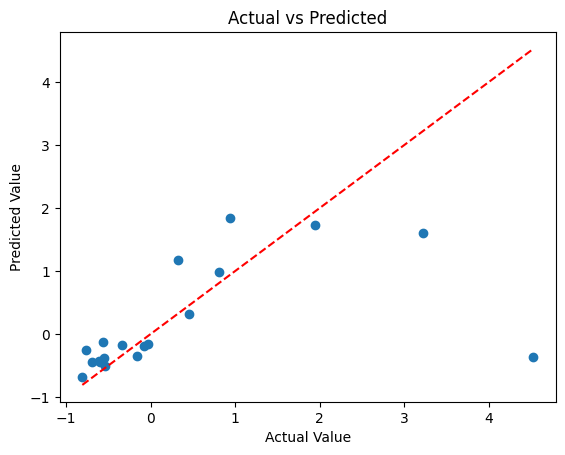

In [317]:
# 실제 값과 예측 값의 산점도 그리기
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Actual vs Predicted")

# y=x의 선 그리기
x = np.linspace(min(min(y_test), min(y_pred)), max(max(y_test), max(y_pred)), 100)
plt.plot(x, x, color='red', linestyle='--')

plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54532 (\N{HANGUL SYLLABLE PEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47112 (\N{HANGUL SYLLABLE RE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPyt

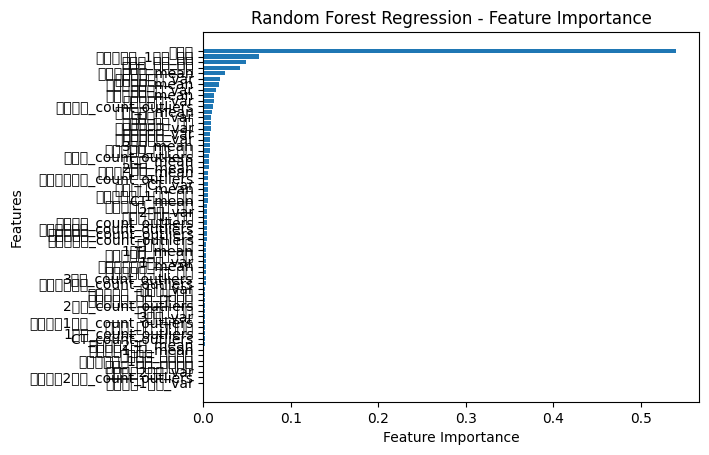

In [318]:
import matplotlib.pyplot as plt

# 피처 중요도 추출
importance = model.feature_importances_

# 중요도가 높은 순서로 정렬된 피처의 인덱스
sorted_idx = np.argsort(importance)

# 중요도가 높은 순서로 정렬된 피처명
sorted_features = X.columns[sorted_idx]

# 중요도 순으로 피처를 그래프에 나타내기
plt.barh(range(len(sorted_idx)), importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), sorted_features)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Regression - Feature Importance')

plt.show()

In [319]:
# 피처 중요도 추출
importance = model.feature_importances_

# 중요도가 높은 순서로 정렬된 피처의 인덱스
sorted_idx = np.argsort(importance)[::-1]

# 중요도가 높은 순서로 정렬된 피처명과 중요도 출력
for i in sorted_idx:
    print(f'{X.columns[i]}: {importance[i]}')

투입량: 0.5401950320916382
보온로온도_1호기_평균: 0.0638953853990086
주조동_습도_분산: 0.048878473796948804
주조동_온도_분산: 0.041905068732106046
증압상승시간_mean: 0.02454892915390352
고속상승시간_var: 0.018736401075022942
실린더압력_mean: 0.01745531343253602
고속속도_var: 0.014245577257876545
비스켓두께_mean: 0.012527341387844821
실린더압력_var: 0.012018451020928642
고속속도_count_outliers: 0.011135651351891152
주조압력_mean: 0.00953906923110376
주조압력_var: 0.008899547584136778
주조동_온도_평균: 0.008422316695656563
증압상승시간_var: 0.008398695057137737
비스켓두께_var: 0.008088263925003595
스프레이시간_var: 0.007475120742812097
3속도_mean: 0.00745092295118919
인입냉각수_압력_분산: 0.007244365798139931
형체력_count_outliers: 0.006302371645879721
형체력_mean: 0.005985536030693427
2속도_mean: 0.005855750091403272
고속상승시간_mean: 0.005708567673296555
고속상승시간_count_outliers: 0.005613171741014365
CT_var: 0.005521639470592362
고속속도_mean: 0.005498828339102866
보온로온도_1호기_분산: 0.005377057397864682
CT_mean: 0.00500948007070374
인입냉각수_온도_분산: 0.0044412139545950335
2속도_var: 0.004420481472476443
주조동_습도_평균: 0.004

### DNN

In [320]:
import tensorflow as tf 
from keras import layers 

# DNN 모델과 최적화 방법을 정의하는 함수
def build_and_compile_model(norm):
  model = tf.keras.Sequential([
      norm,
      # 노드 갯수 64개로 하겠다 -> 하이퍼파라미터이므로 알아서 조정함
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mse',
                # 경사하강법 Adam optimazer을 씀
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [321]:
# 9개 입력변수에 대한 mean, variance 계산 => Z-score normalization (이하 normalization) 준비 
input_layer = tf.keras.layers.Normalization() 
input_layer.adapt(np.array(X_train))   

# 정의된 함수를 호출하여 DNN모델 빌드
dnn_model = build_and_compile_model(input_layer)

# 모델 구조 확인
dnn_model.summary()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_15 (Normaliza  (None, 61)               123       
 tion)                                                           
                                                                 
 dense_62 (Dense)            (None, 64)                3968      
                                                                 
 dense_63 (Dense)            (None, 64)                4160      
                                                                 
 dense_64 (Dense)            (None, 1)                 65        
                                                                 
Total params: 8,316
Trainable params: 8,193
Non-trainable params: 123
_________________________________________________________________


In [322]:
%%time 
# 100 epoch에 대한 훈련을 실행하고 진행 과정 기록
history = dnn_model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 185ms/step - loss: 1.3118 - val_loss: 0.4167
Epoch 2/100
2/2 [==============================] - 0s 35ms/step - loss: 0.9121 - val_loss: 0.3420
Epoch 3/100
2/2 [==============================] - 0s 36ms/step - loss: 0.6931 - val_loss: 0.3485
Epoch 4/100
2/2 [==============================] - 0s 35ms/step - loss: 0.5683 - val_loss: 0.3802
Epoch 5/100
2/2 [==============================] - 0s 41ms/step - loss: 0.4926 - val_loss: 0.3966
Epoch 6/100
2/2 [==============================] - 0s 34ms/step - loss: 0.4154 - val_loss: 0.3879
Epoch 7/100
2/2 [==============================] - 0s 34ms/step - loss: 0.3312 - val_loss: 0.3650
Epoch 8/100
2/2 [==============================] - 0s 33ms/step - loss: 0.2649 - val_loss: 0.3385
Epoch 9/100
2/2 [==============================] - 0s 36ms/step - loss: 0.2177 - val_loss: 0.3173
Epoch 10/100
2/2 [==============================] - 0s 56ms/step - loss: 0.1933 - val_loss: 0.3045
Epoch 11/100
2/2 [

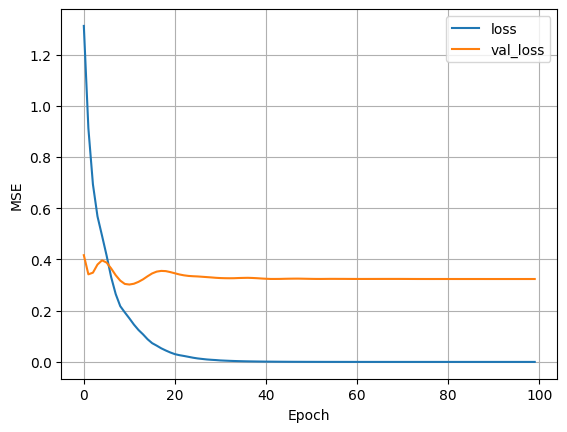

In [323]:
# 훈련과정을 시각화하기 위한 함수 정의
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss') 
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  # plt.ylim([0,50])
  plt.legend()
  plt.grid(True)

# 훈련과정 시각화
plot_loss(history)

In [324]:
# 테스트 결과 수집
test_results = {}
test_results['dnn_model'] = dnn_model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 31ms/step - loss: 4.5070


1/1 [==============================] - 0s 66ms/step


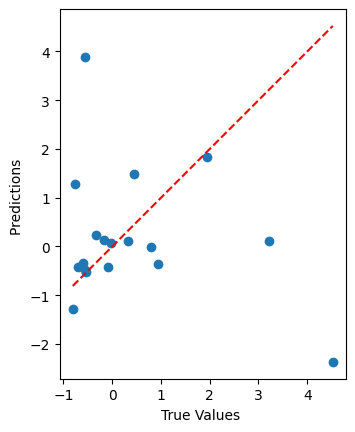

In [325]:
# 실측값과 예측값에 대한 데이터 비교
# y=x 그래프 일수록 학습이 잘된 것임
# 훈련된 모델로 예측하기
test_predictions = dnn_model.predict(X_test).flatten()

# 예측 결과 시각화
a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values ')
plt.ylabel('Predictions ')

# y=x의 선 그리기
x = np.linspace(min(min(y_test), min(y_pred)), max(max(y_test), max(y_pred)), 100)
plt.plot(x, x, color='red', linestyle='--')

plt.show()

# 2호기

## 모델링

In [326]:
from sklearn.model_selection import train_test_split

# 데이터를 입력 변수(X)와 출력 변수(y)로 분할
X = df_u2_scaled.drop('불량률', axis = 1)
y = df_u2_scaled['불량률']

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### LSTM

In [327]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Sequential 모델 생성
model = Sequential()

# LSTM 레이어 추가
model.add(LSTM(units=64, input_shape=(X_train.shape[1], 1)))

# 출력 레이어 추가
model.add(Dense(units=1))

# 모델 컴파일
model.compile(optimizer='adam', loss='mean_squared_error')

# 모델 훈련
history= model.fit(X_train, y_train, epochs=40, batch_size=32, validation_split=0.2)

Epoch 1/40
3/3 [==============================] - 3s 308ms/step - loss: 0.8280 - val_loss: 1.6210
Epoch 2/40
3/3 [==============================] - 0s 52ms/step - loss: 0.8055 - val_loss: 1.6135
Epoch 3/40
3/3 [==============================] - 0s 49ms/step - loss: 0.7913 - val_loss: 1.6185
Epoch 4/40
3/3 [==============================] - 0s 53ms/step - loss: 0.7777 - val_loss: 1.6259
Epoch 5/40
3/3 [==============================] - 0s 50ms/step - loss: 0.7657 - val_loss: 1.6351
Epoch 6/40
3/3 [==============================] - 0s 52ms/step - loss: 0.7540 - val_loss: 1.6341
Epoch 7/40
3/3 [==============================] - 0s 56ms/step - loss: 0.7471 - val_loss: 1.6245
Epoch 8/40
3/3 [==============================] - 0s 51ms/step - loss: 0.7406 - val_loss: 1.6124
Epoch 9/40
3/3 [==============================] - 0s 55ms/step - loss: 0.7326 - val_loss: 1.6152
Epoch 10/40
3/3 [==============================] - 0s 48ms/step - loss: 0.7249 - val_loss: 1.6328
Epoch 11/40
3/3 [===========

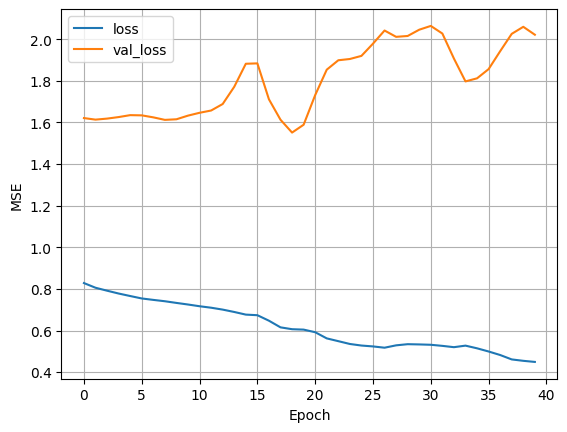

In [328]:
import matplotlib.pyplot as plt 

# 훈련과정을 시각화하기 위한 함수 정의
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss') 
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  # plt.ylim([0,50])
  plt.legend()
  plt.grid(True)

# 훈련과정 시각화
plot_loss(history)

In [329]:
# 테스트 결과 확인 
loss = model.evaluate(X_test, y_test)
print('loss : ', loss)

1/1 [==============================] - 0s 63ms/step - loss: 1.2501
loss :  1.2501214742660522


In [330]:
# 모델 예측
y_pred = model.predict(X_test)

1/1 [==============================] - 1s 660ms/step


1/1 [==============================] - 0s 47ms/step


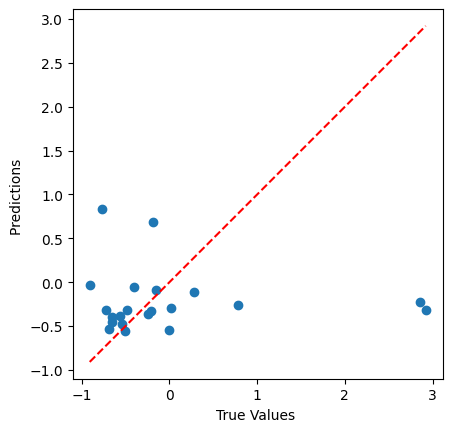

In [331]:
# 실측값과 예측값에 대한 데이터 비교
# y=x 그래프 일수록 학습이 잘된 것임
# 훈련된 모델로 예측하기
test_predictions = model.predict(X_test).flatten()

# 예측 결과 시각화
a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values ')
plt.ylabel('Predictions ')

# y=x의 선 그리기
x = np.linspace(min(min(y_test), min(y_pred)), max(max(y_test), max(y_pred)), 100)
plt.plot(x, x, color='red', linestyle='--')

plt.show()

### 랜덤포레스트

In [332]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# 랜덤 포레스트 회귀 모델 생성 및 학습
model = RandomForestRegressor(n_estimators=300)
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# 평가 지표 계산
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 결과 출력
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R^2 Score:", r2)

Mean Squared Error: 0.7946299096513213
Mean Absolute Error: 0.48098811989672585
R^2 Score: 0.24437985378385974


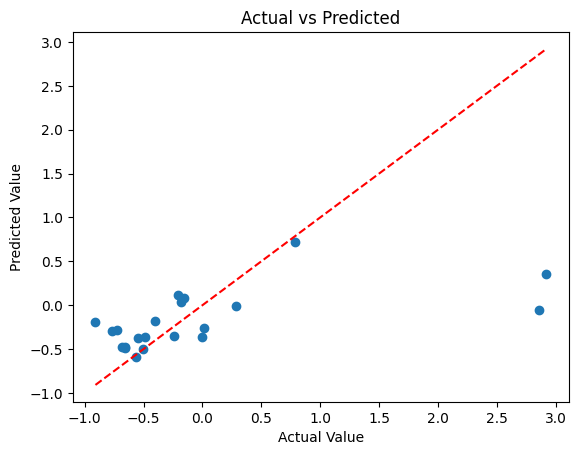

In [333]:
# 실제 값과 예측 값의 산점도 그리기
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Actual vs Predicted")

# y=x의 선 그리기
x = np.linspace(min(min(y_test), min(y_pred)), max(max(y_test), max(y_pred)), 100)
plt.plot(x, x, color='red', linestyle='--')

plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51312 (\N{HANGUL SYLLABLE JO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPy

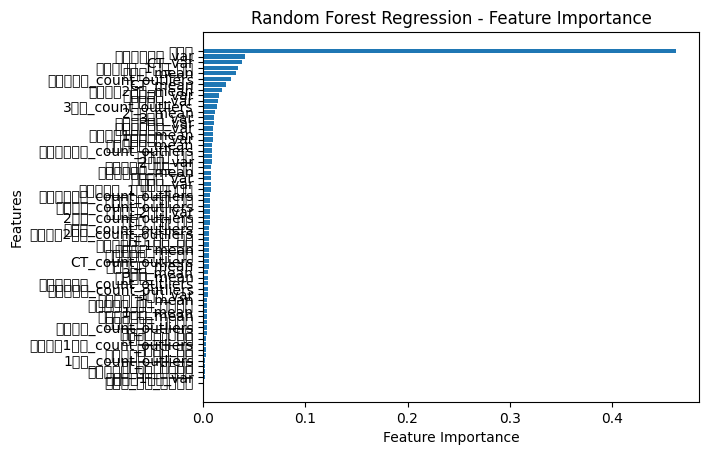

In [334]:
import matplotlib.pyplot as plt

# 피처 중요도 추출
importance = model.feature_importances_

# 중요도가 높은 순서로 정렬된 피처의 인덱스
sorted_idx = np.argsort(importance)

# 중요도가 높은 순서로 정렬된 피처명
sorted_features = X.columns[sorted_idx]

# 중요도 순으로 피처를 그래프에 나타내기
plt.barh(range(len(sorted_idx)), importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), sorted_features)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Regression - Feature Importance')

plt.show()

In [335]:
# 피처 중요도 추출
importance = model.feature_importances_

# 중요도가 높은 순서로 정렬된 피처의 인덱스
sorted_idx = np.argsort(importance)[::-1]

# 중요도가 높은 순서로 정렬된 피처명과 중요도 출력
for i in sorted_idx:
    print(f'{X.columns[i]}: {importance[i]}')

투입량: 0.4628600669288702
스프레이시간_var: 0.04059824686607155
CT_var: 0.03778806789852183
보온로온도_1호기_분산: 0.03390257676772256
형체력_mean: 0.032372026679033106
비스켓두께_count_outliers: 0.027316459544431893
CT_mean: 0.02225964192298163
스프레이2시간_mean: 0.01819518625126004
실린더압력_var: 0.015145784009287096
고속속도_var: 0.014110519376553155
3속도_count_outliers: 0.013533406131875206
2속도_mean: 0.011276499288699475
3속도_var: 0.010800467329414618
고속상승시간_var: 0.009983396398953863
증압상승시간_var: 0.009868714383762512
스프레이1시간_mean: 0.009257958850754045
비스켓두께_var: 0.009240697476782833
실린더압력_mean: 0.008690745076705959
스프레이시간_count_outliers: 0.00859638914356903
에어압력_분산: 0.00847670179395873
2속도_var: 0.008270388903314748
인입냉각수_압력_평균: 0.00787298334175263
스프레이시간_mean: 0.007447150256885513
주조압력_var: 0.007258104522157671
형체력_var: 0.0071852534165545694
보온로온도_1호기_이상치수: 0.007098378079276133
고속상승시간_count_outliers: 0.006907378219763518
인입냉각수_압력_분산: 0.006884237041212302
주조압력_count_outliers: 0.0068334358291803066
스프레이2시간_var: 0.0065583063

### DNN

In [336]:
import tensorflow as tf 
from keras import layers 

# DNN 모델과 최적화 방법을 정의하는 함수
def build_and_compile_model(norm):
  model = tf.keras.Sequential([
      norm,
      # 노드 갯수 64개로 하겠다 -> 하이퍼파라미터이므로 알아서 조정함
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mse',
                # 경사하강법 Adam optimazer을 씀
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [337]:
# 9개 입력변수에 대한 mean, variance 계산 => Z-score normalization (이하 normalization) 준비 
input_layer = tf.keras.layers.Normalization() 
input_layer.adapt(np.array(X_train))   

# 정의된 함수를 호출하여 DNN모델 빌드
dnn_model = build_and_compile_model(input_layer)

# 모델 구조 확인
dnn_model.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_16 (Normaliza  (None, 61)               123       
 tion)                                                           
                                                                 
 dense_66 (Dense)            (None, 64)                3968      
                                                                 
 dense_67 (Dense)            (None, 64)                4160      
                                                                 
 dense_68 (Dense)            (None, 1)                 65        
                                                                 
Total params: 8,316
Trainable params: 8,193
Non-trainable params: 123
_________________________________________________________________


In [338]:
%%time 
# 100 epoch에 대한 훈련을 실행하고 진행 과정 기록
history = dnn_model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=100)

Epoch 1/100
3/3 [==============================] - 1s 91ms/step - loss: 1.5535 - val_loss: 1.5136
Epoch 2/100
3/3 [==============================] - 0s 17ms/step - loss: 0.9306 - val_loss: 1.8216
Epoch 3/100
3/3 [==============================] - 0s 17ms/step - loss: 0.7265 - val_loss: 2.0371
Epoch 4/100
3/3 [==============================] - 0s 17ms/step - loss: 0.6667 - val_loss: 2.1083
Epoch 5/100
3/3 [==============================] - 0s 18ms/step - loss: 0.6142 - val_loss: 2.1305
Epoch 6/100
3/3 [==============================] - 0s 18ms/step - loss: 0.5626 - val_loss: 2.0803
Epoch 7/100
3/3 [==============================] - 0s 21ms/step - loss: 0.4959 - val_loss: 1.9808
Epoch 8/100
3/3 [==============================] - 0s 17ms/step - loss: 0.4356 - val_loss: 1.8451
Epoch 9/100
3/3 [==============================] - 0s 17ms/step - loss: 0.4013 - val_loss: 1.7233
Epoch 10/100
3/3 [==============================] - 0s 24ms/step - loss: 0.3940 - val_loss: 1.6510
Epoch 11/100
3/3 [=

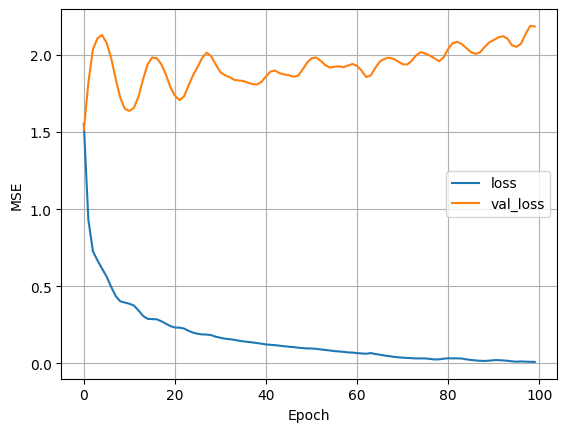

In [339]:
# 훈련과정을 시각화하기 위한 함수 정의
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss') 
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  # plt.ylim([0,50])
  plt.legend()
  plt.grid(True)

# 훈련과정 시각화
plot_loss(history)

In [340]:
# 테스트 결과 수집
test_results = {}
test_results['dnn_model'] = dnn_model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 28ms/step - loss: 1.7838


1/1 [==============================] - 0s 68ms/step


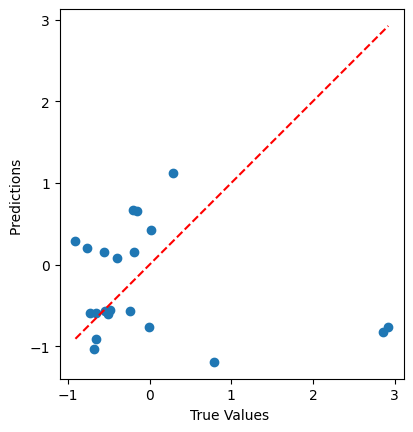

In [341]:
# 실측값과 예측값에 대한 데이터 비교
# y=x 그래프 일수록 학습이 잘된 것임
# 훈련된 모델로 예측하기
test_predictions = dnn_model.predict(X_test).flatten()

# 예측 결과 시각화
a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values ')
plt.ylabel('Predictions ')

# y=x의 선 그리기
x = np.linspace(min(min(y_test), min(y_pred)), max(max(y_test), max(y_pred)), 100)
plt.plot(x, x, color='red', linestyle='--')

plt.show()

# 3호기

## 모델링

In [342]:
from sklearn.model_selection import train_test_split

# 데이터를 입력 변수(X)와 출력 변수(y)로 분할
X = df_u3_scaled.drop('불량률', axis = 1)
y = df_u3_scaled['불량률']

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### LSTM

In [343]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Sequential 모델 생성
model = Sequential()

# LSTM 레이어 추가
model.add(LSTM(units=64, input_shape=(X_train.shape[1], 1)))

# 출력 레이어 추가
model.add(Dense(units=1))

# 모델 컴파일
model.compile(optimizer='adam', loss='mean_squared_error')

# 모델 훈련
history= model.fit(X_train, y_train, epochs=40, batch_size=32, validation_split=0.2)

Epoch 1/40
2/2 [==============================] - 4s 592ms/step - loss: 0.2730 - val_loss: 1.8138
Epoch 2/40
2/2 [==============================] - 0s 74ms/step - loss: 0.2634 - val_loss: 1.8161
Epoch 3/40
2/2 [==============================] - 0s 85ms/step - loss: 0.2573 - val_loss: 1.8190
Epoch 4/40
2/2 [==============================] - 0s 71ms/step - loss: 0.2502 - val_loss: 1.8252
Epoch 5/40
2/2 [==============================] - 0s 67ms/step - loss: 0.2469 - val_loss: 1.8313
Epoch 6/40
2/2 [==============================] - 0s 75ms/step - loss: 0.2412 - val_loss: 1.8343
Epoch 7/40
2/2 [==============================] - 0s 70ms/step - loss: 0.2367 - val_loss: 1.8378
Epoch 8/40
2/2 [==============================] - 0s 80ms/step - loss: 0.2345 - val_loss: 1.8411
Epoch 9/40
2/2 [==============================] - 0s 67ms/step - loss: 0.2303 - val_loss: 1.8389
Epoch 10/40
2/2 [==============================] - 0s 66ms/step - loss: 0.2284 - val_loss: 1.8328
Epoch 11/40
2/2 [===========

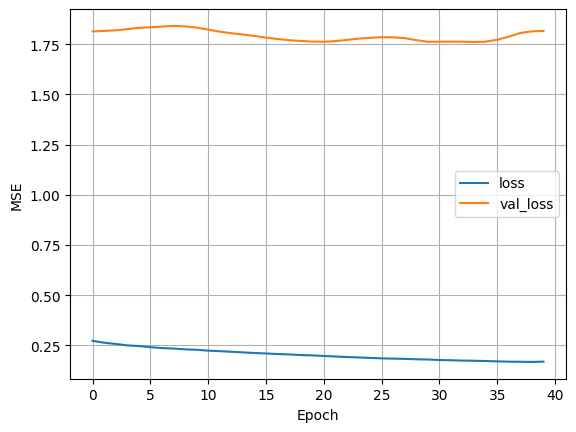

In [344]:
import matplotlib.pyplot as plt 

# 훈련과정을 시각화하기 위한 함수 정의
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss') 
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  # plt.ylim([0,50])
  plt.legend()
  plt.grid(True)

# 훈련과정 시각화
plot_loss(history)

In [345]:
# 테스트 결과 확인 
loss = model.evaluate(X_test, y_test)
print('loss : ', loss)

1/1 [==============================] - 0s 56ms/step - loss: 2.4761
loss :  2.476066827774048


In [346]:
# 모델 예측
y_pred = model.predict(X_test)

1/1 [==============================] - 1s 674ms/step


1/1 [==============================] - 0s 41ms/step


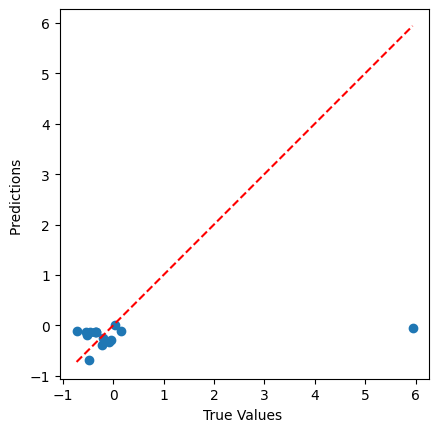

In [347]:
# 실측값과 예측값에 대한 데이터 비교
# y=x 그래프 일수록 학습이 잘된 것임
# 훈련된 모델로 예측하기
test_predictions = model.predict(X_test).flatten()

# 예측 결과 시각화
a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values ')
plt.ylabel('Predictions ')

# y=x의 선 그리기
x = np.linspace(min(min(y_test), min(y_pred)), max(max(y_test), max(y_pred)), 100)
plt.plot(x, x, color='red', linestyle='--')

plt.show()

### 랜덤포레스트

In [348]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# 랜덤 포레스트 회귀 모델 생성 및 학습
model = RandomForestRegressor(n_estimators=300)
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# 평가 지표 계산
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 결과 출력
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R^2 Score:", r2)

Mean Squared Error: 2.5986708090510047
Mean Absolute Error: 0.573111513522378
R^2 Score: -0.05123303028189419


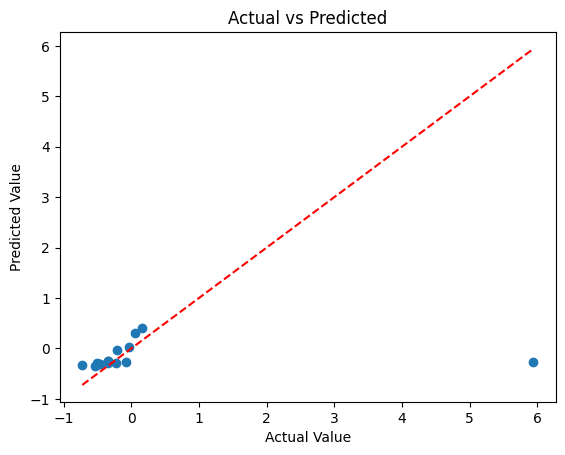

In [349]:
# 실제 값과 예측 값의 산점도 그리기
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Actual vs Predicted")

# y=x의 선 그리기
x = np.linspace(min(min(y_test), min(y_pred)), max(max(y_test), max(y_pred)), 100)
plt.plot(x, x, color='red', linestyle='--')

plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51312 (\N{HANGUL SYLLABLE JO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPy

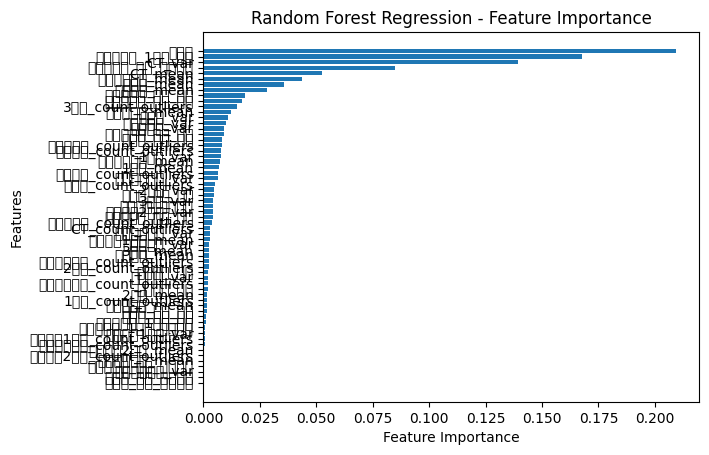

In [350]:
import matplotlib.pyplot as plt

# 피처 중요도 추출
importance = model.feature_importances_

# 중요도가 높은 순서로 정렬된 피처의 인덱스
sorted_idx = np.argsort(importance)

# 중요도가 높은 순서로 정렬된 피처명
sorted_features = X.columns[sorted_idx]

# 중요도 순으로 피처를 그래프에 나타내기
plt.barh(range(len(sorted_idx)), importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), sorted_features)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Regression - Feature Importance')

plt.show()

In [351]:
# 피처 중요도 추출
importance = model.feature_importances_

# 중요도가 높은 순서로 정렬된 피처의 인덱스
sorted_idx = np.argsort(importance)[::-1]

# 중요도가 높은 순서로 정렬된 피처명과 중요도 출력
for i in sorted_idx:
    print(f'{X.columns[i]}: {importance[i]}')

투입량: 0.20926038420461712
보온로온도_1호기_분산: 0.16785509198824114
CT_var: 0.13947863293687182
인입냉각수_압력_이상치수: 0.0850663190495055
CT_mean: 0.052388693049125384
고속상승시간_mean: 0.043655382762768126
형체력_mean: 0.03551064435545047
고속속도_mean: 0.028096810580691606
인입냉각수_온도_평균: 0.01846256956143532
인입냉각수_압력_분산: 0.01716398435808767
3속도_count_outliers: 0.014679508049984217
비스켓두께_mean: 0.012034186085415432
형체력_var: 0.010741296778366091
비스켓두께_var: 0.010001171450365077
고속속도_var: 0.009157322074714569
인입냉각수_온도_분산: 0.009007577743703367
주조동_습도_분산: 0.008283565092612188
비스켓두께_count_outliers: 0.008021978546455689
고속속도_count_outliers: 0.007929392377054444
1속도_var: 0.007592912423243025
스프레이시간_mean: 0.007402239893215143
1속도_mean: 0.007123381785251634
주조압력_count_outliers: 0.006320094180850605
고속상승시간_var: 0.006273335706297949
형체력_count_outliers: 0.004930587156458043
2속도_var: 0.004850328870612987
주조동_습도_평균: 0.00462909262443901
3속도_var: 0.004446435010911288
에어압력_이상치수: 0.004420756274768661
스프레이2시간_var: 0.004360887507420679
인

### DNN

In [352]:
import tensorflow as tf 
from keras import layers 

# DNN 모델과 최적화 방법을 정의하는 함수
def build_and_compile_model(norm):
  model = tf.keras.Sequential([
      norm,
      # 노드 갯수 64개로 하겠다 -> 하이퍼파라미터이므로 알아서 조정함
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mse',
                # 경사하강법 Adam optimazer을 씀
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [353]:
# 9개 입력변수에 대한 mean, variance 계산 => Z-score normalization (이하 normalization) 준비 
input_layer = tf.keras.layers.Normalization() 
input_layer.adapt(np.array(X_train))   

# 정의된 함수를 호출하여 DNN모델 빌드
dnn_model = build_and_compile_model(input_layer)

# 모델 구조 확인
dnn_model.summary()

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_17 (Normaliza  (None, 61)               123       
 tion)                                                           
                                                                 
 dense_70 (Dense)            (None, 64)                3968      
                                                                 
 dense_71 (Dense)            (None, 64)                4160      
                                                                 
 dense_72 (Dense)            (None, 1)                 65        
                                                                 
Total params: 8,316
Trainable params: 8,193
Non-trainable params: 123
_________________________________________________________________


In [354]:
%%time 
# 100 epoch에 대한 훈련을 실행하고 진행 과정 기록
history = dnn_model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 187ms/step - loss: 0.7372 - val_loss: 1.8392
Epoch 2/100
2/2 [==============================] - 0s 36ms/step - loss: 0.4483 - val_loss: 1.7179
Epoch 3/100
2/2 [==============================] - 0s 51ms/step - loss: 0.3085 - val_loss: 1.6205
Epoch 4/100
2/2 [==============================] - 0s 32ms/step - loss: 0.2111 - val_loss: 1.5510
Epoch 5/100
2/2 [==============================] - 0s 33ms/step - loss: 0.1651 - val_loss: 1.5013
Epoch 6/100
2/2 [==============================] - 0s 32ms/step - loss: 0.1356 - val_loss: 1.4704
Epoch 7/100
2/2 [==============================] - 0s 36ms/step - loss: 0.1104 - val_loss: 1.4488
Epoch 8/100
2/2 [==============================] - 0s 35ms/step - loss: 0.0964 - val_loss: 1.4333
Epoch 9/100
2/2 [==============================] - 0s 35ms/step - loss: 0.0821 - val_loss: 1.4199
Epoch 10/100
2/2 [==============================] - 0s 34ms/step - loss: 0.0680 - val_loss: 1.4120
Epoch 11/100
2/2 [

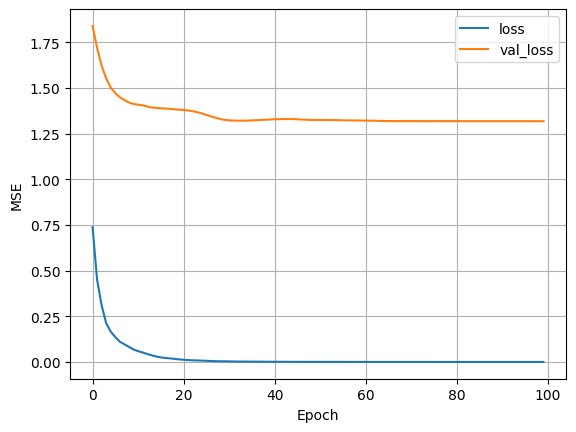

In [355]:
# 훈련과정을 시각화하기 위한 함수 정의
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss') 
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  # plt.ylim([0,50])
  plt.legend()
  plt.grid(True)

# 훈련과정 시각화
plot_loss(history)

In [356]:
# 테스트 결과 수집
test_results = {}
test_results['dnn_model'] = dnn_model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 28ms/step - loss: 41.5450


1/1 [==============================] - 0s 72ms/step


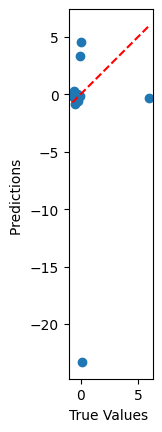

In [357]:
# 실측값과 예측값에 대한 데이터 비교
# y=x 그래프 일수록 학습이 잘된 것임
# 훈련된 모델로 예측하기
test_predictions = dnn_model.predict(X_test).flatten()

# 예측 결과 시각화
a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values ')
plt.ylabel('Predictions ')

# y=x의 선 그리기
x = np.linspace(min(min(y_test), min(y_pred)), max(max(y_test), max(y_pred)), 100)
plt.plot(x, x, color='red', linestyle='--')

plt.show()

# 4호기

## 모델링

In [358]:
from sklearn.model_selection import train_test_split

# 데이터를 입력 변수(X)와 출력 변수(y)로 분할
X = df_u4_scaled.drop('불량률', axis = 1)
y = df_u4_scaled['불량률']

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### LSTM

In [359]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Sequential 모델 생성
model = Sequential()

# LSTM 레이어 추가
model.add(LSTM(units=64, input_shape=(X_train.shape[1], 1)))

# 출력 레이어 추가
model.add(Dense(units=1))

# 모델 컴파일
model.compile(optimizer='adam', loss='mean_squared_error')

# 모델 훈련
history= model.fit(X_train, y_train, epochs=40, batch_size=32, validation_split=0.2)

Epoch 1/40
2/2 [==============================] - 3s 955ms/step - loss: 1.3433 - val_loss: 0.6774
Epoch 2/40
2/2 [==============================] - 0s 120ms/step - loss: 1.3201 - val_loss: 0.6753
Epoch 3/40
2/2 [==============================] - 0s 160ms/step - loss: 1.3070 - val_loss: 0.6719
Epoch 4/40
2/2 [==============================] - 0s 108ms/step - loss: 1.2791 - val_loss: 0.6716
Epoch 5/40
2/2 [==============================] - 0s 126ms/step - loss: 1.2613 - val_loss: 0.6738
Epoch 6/40
2/2 [==============================] - 0s 121ms/step - loss: 1.2437 - val_loss: 0.6796
Epoch 7/40
2/2 [==============================] - 0s 131ms/step - loss: 1.2238 - val_loss: 0.6915
Epoch 8/40
2/2 [==============================] - 0s 106ms/step - loss: 1.2182 - val_loss: 0.7156
Epoch 9/40
2/2 [==============================] - 0s 111ms/step - loss: 1.1905 - val_loss: 0.7476
Epoch 10/40
2/2 [==============================] - 0s 102ms/step - loss: 1.1714 - val_loss: 0.7917
Epoch 11/40
2/2 [==

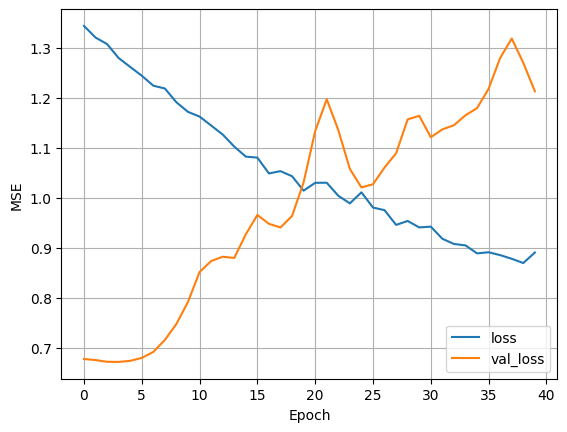

In [360]:
import matplotlib.pyplot as plt 

# 훈련과정을 시각화하기 위한 함수 정의
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss') 
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  # plt.ylim([0,50])
  plt.legend()
  plt.grid(True)

# 훈련과정 시각화
plot_loss(history)

In [361]:
# 테스트 결과 확인 
loss = model.evaluate(X_test, y_test)
print('loss : ', loss)

1/1 [==============================] - 0s 35ms/step - loss: 0.1879
loss :  0.1879025548696518


In [362]:
# 모델 예측
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 431ms/step


1/1 [==============================] - 0s 34ms/step


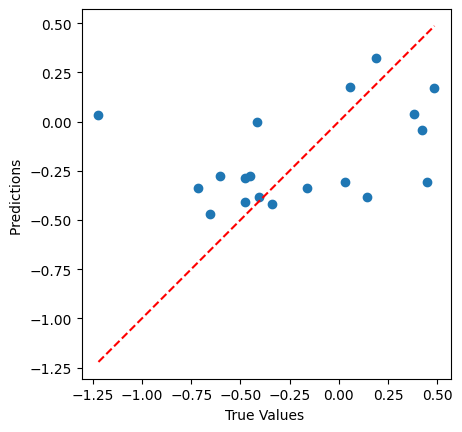

In [363]:
# 실측값과 예측값에 대한 데이터 비교
# y=x 그래프 일수록 학습이 잘된 것임
# 훈련된 모델로 예측하기
test_predictions = model.predict(X_test).flatten()

# 예측 결과 시각화
a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values ')
plt.ylabel('Predictions ')

# y=x의 선 그리기
x = np.linspace(min(min(y_test), min(y_pred)), max(max(y_test), max(y_pred)), 100)
plt.plot(x, x, color='red', linestyle='--')

plt.show()

### 랜덤포레스트

In [364]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# 랜덤 포레스트 회귀 모델 생성 및 학습
model = RandomForestRegressor(n_estimators=300)
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# 평가 지표 계산
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 결과 출력
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R^2 Score:", r2)

Mean Squared Error: 0.3008154812834724
Mean Absolute Error: 0.3262733212201341
R^2 Score: -0.4238420341361522


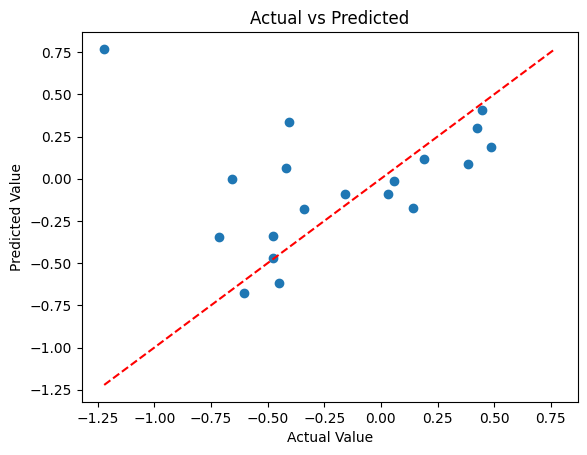

In [365]:
# 실제 값과 예측 값의 산점도 그리기
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Actual vs Predicted")

# y=x의 선 그리기
x = np.linspace(min(min(y_test), min(y_pred)), max(max(y_test), max(y_pred)), 100)
plt.plot(x, x, color='red', linestyle='--')

plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54532 (\N{HANGUL SYLLABLE PEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47112 (\N{HANGUL SYLLABLE RE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPyt

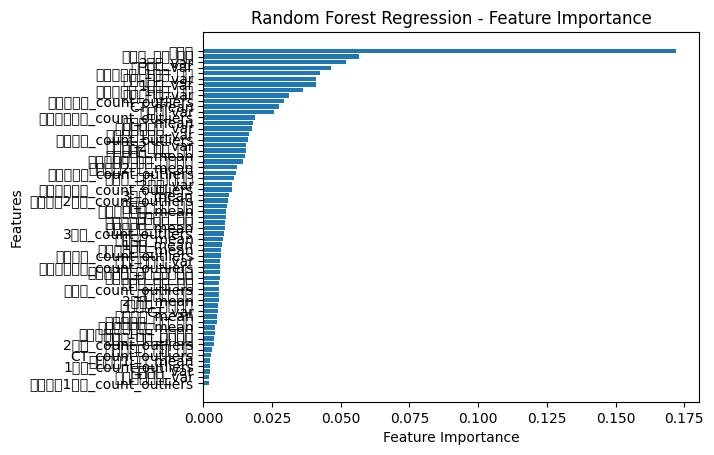

In [366]:
import matplotlib.pyplot as plt

# 피처 중요도 추출
importance = model.feature_importances_

# 중요도가 높은 순서로 정렬된 피처의 인덱스
sorted_idx = np.argsort(importance)

# 중요도가 높은 순서로 정렬된 피처명
sorted_features = X.columns[sorted_idx]

# 중요도 순으로 피처를 그래프에 나타내기
plt.barh(range(len(sorted_idx)), importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), sorted_features)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Regression - Feature Importance')

plt.show()

In [367]:
# 피처 중요도 추출
importance = model.feature_importances_

# 중요도가 높은 순서로 정렬된 피처의 인덱스
sorted_idx = np.argsort(importance)[::-1]

# 중요도가 높은 순서로 정렬된 피처명과 중요도 출력
for i in sorted_idx:
    print(f'{X.columns[i]}: {importance[i]}')

투입량: 0.17190643727017504
주조동_온도_분산: 0.056459025078228274
3속도_var: 0.051833352343602306
주조압력_var: 0.046577955706404064
보온로온도_1호기_평균: 0.04245293199364097
실린더압력_var: 0.041066505187218265
1속도_var: 0.04084757838388989
보온로온도_1호기_분산: 0.036270853604464165
비스켓두께_var: 0.030983876457559092
실린더압력_count_outliers: 0.029237508144118005
CT_mean: 0.02733090482997047
형체력_var: 0.025856440631163602
고속상승시간_count_outliers: 0.018892011255929774
형체력_mean: 0.018207695295231807
스프레이시간_var: 0.017776586293144853
스프레이1시간_var: 0.016650553123193836
주조압력_count_outliers: 0.016319364175418787
스프레이2시간_var: 0.015543272355385855
주조동_습도_평균: 0.015456793535035894
실린더압력_mean: 0.015292402739961434
인입냉각수_압력_이상치수: 0.014420650167934132
스프레이2시간_mean: 0.012126220033276416
비스켓두께_count_outliers: 0.01203129752671676
주조동_온도_이상치수: 0.01109514821069702
2속도_var: 0.010464466092220247
스프레이시간_count_outliers: 0.010383246187313995
3속도_mean: 0.009437922288595064
스프레이2시간_count_outliers: 0.008954105559130955
주조동_온도_평균: 0.008527668584583498
스프레이시간_

### DNN

In [368]:
import tensorflow as tf 
from keras import layers 

# DNN 모델과 최적화 방법을 정의하는 함수
def build_and_compile_model(norm):
  model = tf.keras.Sequential([
      norm,
      # 노드 갯수 64개로 하겠다 -> 하이퍼파라미터이므로 알아서 조정함
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mse',
                # 경사하강법 Adam optimazer을 씀
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [369]:
# 9개 입력변수에 대한 mean, variance 계산 => Z-score normalization (이하 normalization) 준비 
input_layer = tf.keras.layers.Normalization() 
input_layer.adapt(np.array(X_train))   

# 정의된 함수를 호출하여 DNN모델 빌드
dnn_model = build_and_compile_model(input_layer)

# 모델 구조 확인
dnn_model.summary()

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_18 (Normaliza  (None, 61)               123       
 tion)                                                           
                                                                 
 dense_74 (Dense)            (None, 64)                3968      
                                                                 
 dense_75 (Dense)            (None, 64)                4160      
                                                                 
 dense_76 (Dense)            (None, 1)                 65        
                                                                 
Total params: 8,316
Trainable params: 8,193
Non-trainable params: 123
_________________________________________________________________


In [370]:
%%time 
# 100 epoch에 대한 훈련을 실행하고 진행 과정 기록
history = dnn_model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=100)

Epoch 1/100
2/2 [==============================] - 2s 274ms/step - loss: 1.9067 - val_loss: 0.9488
Epoch 2/100
2/2 [==============================] - 0s 47ms/step - loss: 1.5344 - val_loss: 0.8396
Epoch 3/100
2/2 [==============================] - 0s 47ms/step - loss: 1.2279 - val_loss: 0.7823
Epoch 4/100
2/2 [==============================] - 0s 47ms/step - loss: 1.1259 - val_loss: 0.7480
Epoch 5/100
2/2 [==============================] - 0s 50ms/step - loss: 0.9299 - val_loss: 0.7216
Epoch 6/100
2/2 [==============================] - 0s 54ms/step - loss: 0.8266 - val_loss: 0.6961
Epoch 7/100
2/2 [==============================] - 0s 64ms/step - loss: 0.7177 - val_loss: 0.6751
Epoch 8/100
2/2 [==============================] - 0s 59ms/step - loss: 0.6299 - val_loss: 0.6574
Epoch 9/100
2/2 [==============================] - 0s 71ms/step - loss: 0.5568 - val_loss: 0.6456
Epoch 10/100
2/2 [==============================] - 0s 50ms/step - loss: 0.4909 - val_loss: 0.6416
Epoch 11/100
2/2 [

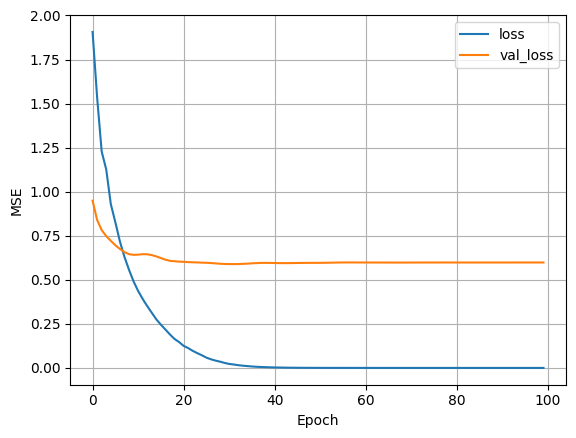

In [371]:
# 훈련과정을 시각화하기 위한 함수 정의
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss') 
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  # plt.ylim([0,50])
  plt.legend()
  plt.grid(True)

# 훈련과정 시각화
plot_loss(history)

In [372]:
# 테스트 결과 수집
test_results = {}
test_results['dnn_model'] = dnn_model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 34ms/step - loss: 0.5563


1/1 [==============================] - 0s 75ms/step


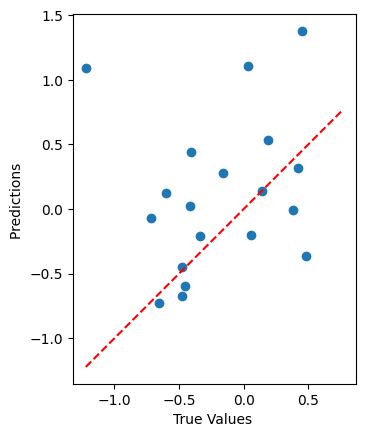

In [373]:
# 실측값과 예측값에 대한 데이터 비교
# y=x 그래프 일수록 학습이 잘된 것임
# 훈련된 모델로 예측하기
test_predictions = dnn_model.predict(X_test).flatten()

# 예측 결과 시각화
a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values ')
plt.ylabel('Predictions ')

# y=x의 선 그리기
x = np.linspace(min(min(y_test), min(y_pred)), max(max(y_test), max(y_pred)), 100)
plt.plot(x, x, color='red', linestyle='--')

plt.show()

# 8호기

## 모델링

In [374]:
from sklearn.model_selection import train_test_split

# 데이터를 입력 변수(X)와 출력 변수(y)로 분할
X = df_u8_scaled.drop('불량률', axis = 1)
y = df_u8_scaled['불량률']

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### LSTM

In [375]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Sequential 모델 생성
model = Sequential()

# LSTM 레이어 추가
model.add(LSTM(units=64, input_shape=(X_train.shape[1], 1)))

# 출력 레이어 추가
model.add(Dense(units=1))

# 모델 컴파일
model.compile(optimizer='adam', loss='mean_squared_error')

# 모델 훈련
history= model.fit(X_train, y_train, epochs=40, batch_size=32, validation_split=0.2)

Epoch 1/40
2/2 [==============================] - 4s 882ms/step - loss: 1.2607 - val_loss: 0.7673
Epoch 2/40
2/2 [==============================] - 0s 132ms/step - loss: 1.2334 - val_loss: 0.7395
Epoch 3/40
2/2 [==============================] - 0s 121ms/step - loss: 1.2071 - val_loss: 0.7144
Epoch 4/40
2/2 [==============================] - 0s 128ms/step - loss: 1.1838 - val_loss: 0.6906
Epoch 5/40
2/2 [==============================] - 0s 136ms/step - loss: 1.1709 - val_loss: 0.6667
Epoch 6/40
2/2 [==============================] - 0s 133ms/step - loss: 1.1454 - val_loss: 0.6466
Epoch 7/40
2/2 [==============================] - 0s 121ms/step - loss: 1.1255 - val_loss: 0.6270
Epoch 8/40
2/2 [==============================] - 0s 130ms/step - loss: 1.0954 - val_loss: 0.6123
Epoch 9/40
2/2 [==============================] - 0s 130ms/step - loss: 1.0749 - val_loss: 0.6003
Epoch 10/40
2/2 [==============================] - 0s 136ms/step - loss: 1.0575 - val_loss: 0.5972
Epoch 11/40
2/2 [==

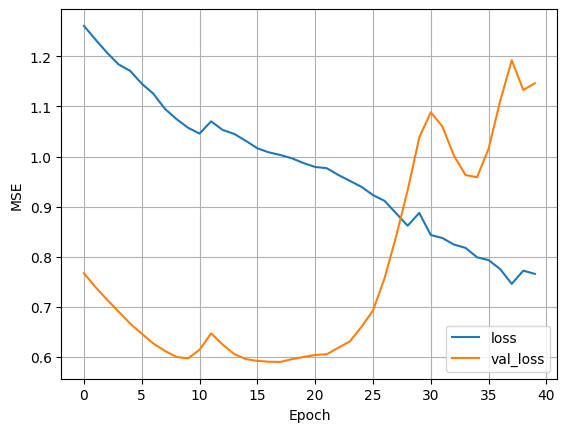

In [376]:
import matplotlib.pyplot as plt 

# 훈련과정을 시각화하기 위한 함수 정의
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss') 
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  # plt.ylim([0,50])
  plt.legend()
  plt.grid(True)

# 훈련과정 시각화
plot_loss(history)

In [377]:
# 테스트 결과 확인 
loss = model.evaluate(X_test, y_test)
print('loss : ', loss)

1/1 [==============================] - 0s 36ms/step - loss: 0.1219
loss :  0.12192796170711517


In [378]:
# 모델 예측
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 479ms/step


1/1 [==============================] - 0s 32ms/step


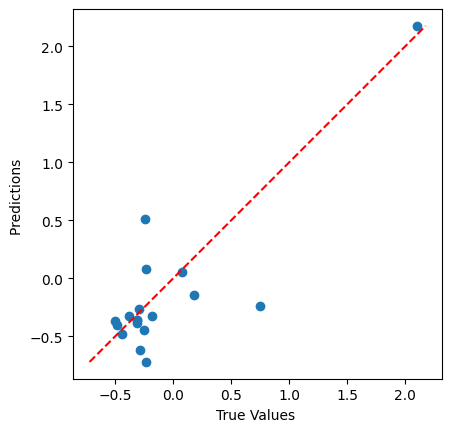

In [379]:
# 실측값과 예측값에 대한 데이터 비교
# y=x 그래프 일수록 학습이 잘된 것임
# 훈련된 모델로 예측하기
test_predictions = model.predict(X_test).flatten()

# 예측 결과 시각화
a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values ')
plt.ylabel('Predictions ')

# y=x의 선 그리기
x = np.linspace(min(min(y_test), min(y_pred)), max(max(y_test), max(y_pred)), 100)
plt.plot(x, x, color='red', linestyle='--')

plt.show()

### 랜덤포레스트

In [380]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# 랜덤 포레스트 회귀 모델 생성 및 학습
model = RandomForestRegressor(n_estimators=300)
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# 평가 지표 계산
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 결과 출력
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R^2 Score:", r2)

Mean Squared Error: 0.43191749792494866
Mean Absolute Error: 0.45004385596153473
R^2 Score: -0.2048778468092214


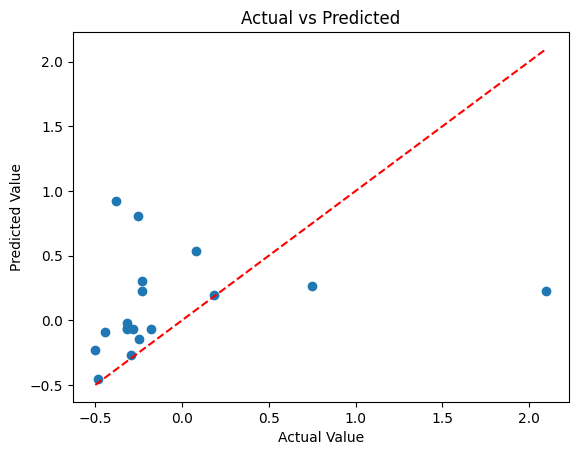

In [381]:
# 실제 값과 예측 값의 산점도 그리기
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Actual vs Predicted")

# y=x의 선 그리기
x = np.linspace(min(min(y_test), min(y_pred)), max(max(y_test), max(y_pred)), 100)
plt.plot(x, x, color='red', linestyle='--')

plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49549 (\N{HANGUL SYLLABLE SOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54805 (\N{HANGUL SYLLABLE HYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-pack

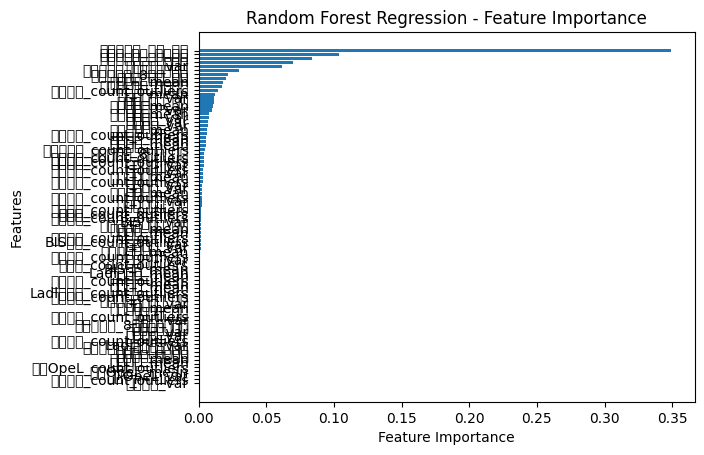

In [382]:
import matplotlib.pyplot as plt

# 피처 중요도 추출
importance = model.feature_importances_

# 중요도가 높은 순서로 정렬된 피처의 인덱스
sorted_idx = np.argsort(importance)

# 중요도가 높은 순서로 정렬된 피처명
sorted_features = X.columns[sorted_idx]

# 중요도 순으로 피처를 그래프에 나타내기
plt.barh(range(len(sorted_idx)), importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), sorted_features)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Regression - Feature Importance')

plt.show()

In [383]:
# 피처 중요도 추출
importance = model.feature_importances_

# 중요도가 높은 순서로 정렬된 피처의 인덱스
sorted_idx = np.argsort(importance)[::-1]

# 중요도가 높은 순서로 정렬된 피처명과 중요도 출력
for i in sorted_idx:
    print(f'{X.columns[i]}: {importance[i]}')

인입냉각수_온도_분산: 0.3489964298129322
주조동_온도_이상치수: 0.10379929000358716
인입냉각수_압력_분산: 0.08407381410120968
투입량: 0.07015393536187792
피크속도_var: 0.06182420642368496
인입냉각수_온도_이상치수: 0.029940764292272486
보온로온도_8호기_평균: 0.021664954272080657
주조동_습도_평균: 0.020080344607110612
고속구간_mean: 0.01806139692312277
주조동_습도_이상치수: 0.01741100066851475
감속속도_count_outliers: 0.014549857864343605
압출한_mean: 0.012092312437792163
감속속도_var: 0.01131400727521621
주조동_온도_평균: 0.011090879239533379
충진시간_mean: 0.010638464706419722
주조압력_var: 0.009954916090062403
고속개시_mean: 0.007591799821717834
고속속도_var: 0.007411507175218671
저속가속_var: 0.007079241435281043
압출한_var: 0.006855278114974726
충진압력_mean: 0.006551113024305751
저속가속_count_outliers: 0.00652929876074704
저속변동_mean: 0.005821616613307585
저속가속_mean: 0.005341771770842069
고속속도_mean: 0.005249581899558895
싸이클타임_count_outliers: 0.0049144471021484405
보온로온도_8호기_분산: 0.004314082646797056
감속구간_count_outliers: 0.004100562802373277
승압시간_count_outliers: 0.00397285683747954
충진시간_var: 0.003784133456333

### DNN

In [384]:
import tensorflow as tf 
from keras import layers 

# DNN 모델과 최적화 방법을 정의하는 함수
def build_and_compile_model(norm):
  model = tf.keras.Sequential([
      norm,
      # 노드 갯수 64개로 하겠다 -> 하이퍼파라미터이므로 알아서 조정함
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mse',
                # 경사하강법 Adam optimazer을 씀
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [385]:
# 9개 입력변수에 대한 mean, variance 계산 => Z-score normalization (이하 normalization) 준비 
input_layer = tf.keras.layers.Normalization() 
input_layer.adapt(np.array(X_train))   

# 정의된 함수를 호출하여 DNN모델 빌드
dnn_model = build_and_compile_model(input_layer)

# 모델 구조 확인
dnn_model.summary()

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_19 (Normaliza  (None, 85)               171       
 tion)                                                           
                                                                 
 dense_78 (Dense)            (None, 64)                5504      
                                                                 
 dense_79 (Dense)            (None, 64)                4160      
                                                                 
 dense_80 (Dense)            (None, 1)                 65        
                                                                 
Total params: 9,900
Trainable params: 9,729
Non-trainable params: 171
_________________________________________________________________


In [386]:
%%time 
# 100 epoch에 대한 훈련을 실행하고 진행 과정 기록
history = dnn_model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 166ms/step - loss: 1.6484 - val_loss: 1.1903
Epoch 2/100
2/2 [==============================] - 0s 34ms/step - loss: 1.3272 - val_loss: 1.0159
Epoch 3/100
2/2 [==============================] - 0s 36ms/step - loss: 1.1286 - val_loss: 0.9027
Epoch 4/100
2/2 [==============================] - 0s 30ms/step - loss: 0.9816 - val_loss: 0.8631
Epoch 5/100
2/2 [==============================] - 0s 35ms/step - loss: 0.8434 - val_loss: 0.8896
Epoch 6/100
2/2 [==============================] - 0s 38ms/step - loss: 0.7933 - val_loss: 0.9431
Epoch 7/100
2/2 [==============================] - 0s 34ms/step - loss: 0.6900 - val_loss: 1.0275
Epoch 8/100
2/2 [==============================] - 0s 40ms/step - loss: 0.6494 - val_loss: 1.1196
Epoch 9/100
2/2 [==============================] - 0s 33ms/step - loss: 0.5843 - val_loss: 1.2023
Epoch 10/100
2/2 [==============================] - 0s 39ms/step - loss: 0.5283 - val_loss: 1.2637
Epoch 11/100
2/2 [

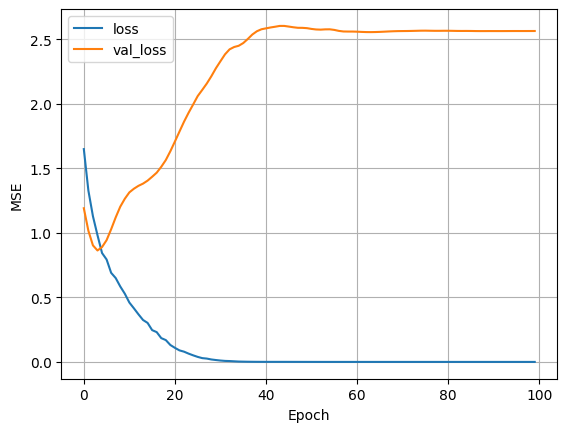

In [387]:
# 훈련과정을 시각화하기 위한 함수 정의
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss') 
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  # plt.ylim([0,50])
  plt.legend()
  plt.grid(True)

# 훈련과정 시각화
plot_loss(history)

In [388]:
# 테스트 결과 수집
test_results = {}
test_results['dnn_model'] = dnn_model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 28ms/step - loss: 3.6117


1/1 [==============================] - 0s 66ms/step


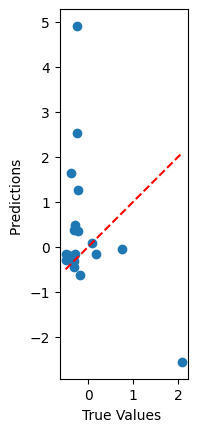

In [389]:
# 실측값과 예측값에 대한 데이터 비교
# y=x 그래프 일수록 학습이 잘된 것임
# 훈련된 모델로 예측하기
test_predictions = dnn_model.predict(X_test).flatten()

# 예측 결과 시각화
a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values ')
plt.ylabel('Predictions ')

# y=x의 선 그리기
x = np.linspace(min(min(y_test), min(y_pred)), max(max(y_test), max(y_pred)), 100)
plt.plot(x, x, color='red', linestyle='--')

plt.show()